In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import math
import gc
import seaborn as sns
import lightgbm as lgbm 
import xgboost as xgb

from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#import catboost as cat

In [2]:
df = pd.read_csv('./data/df_stat.csv')

In [3]:
from sklearn.metrics import mean_squared_error
def metric(y,x):
    return round(np.sqrt(mean_squared_error(x,y)),3)

In [4]:
df = pd.get_dummies(df, columns=['location'], drop_first=True)

In [5]:
df.head(1)

,Unnamed: 0,ID,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,...,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,location_B,location_C,location_D,location_E
0,0,ID_train_0,45.126304,27.208333,19.275,22.299527,2.594011,6.728895,21.358333,7.933333,...,87.614167,87.752434,0.070374,0.004952,87.762083,0.2575,0,1,0,0


In [6]:
RMSE_train = []
RMSE_test = []

In [7]:
X = df.drop(['target', 'ID'], axis=1)
y = df.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
columns = X_train.columns
columns

Index(['Unnamed: 0', 'max_temp', 'min_temp', 'mean_temp', 'std_temp',
       'var_temp', 'median_temp', 'ptp_temp', 'max_precip', 'min_precip',
       'mean_precip', 'std_precip', 'var_precip', 'median_precip',
       'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
       'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
       'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
       'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
       'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
       'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
       'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
       'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
       'median_atmos_press', 'ptp_atmos_press', 'location_B', 'location_C',
       'location_D', 'location_E'],
      dtype='object')

In [10]:
scalerStand = StandardScaler()
X_train = scalerStand.fit_transform(X_train)
X_test = scalerStand.transform(X_test)

scalerMinMax = MinMaxScaler()
X_train = scalerMinMax.fit_transform(X_train)
X_test = scalerMinMax.transform(X_test)

In [11]:
# scaled X_train data to pandas Dataframe
X_train = pd.DataFrame(X_train)
X_train.columns = columns
X_train.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
# scaled X_test data to pandas Dataframe
X_test = pd.DataFrame(X_test)
X_test.columns = columns
X_test.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
# predict on test-set
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# RMSE on train and test set
print("Train RMSE:", metric(y_train, y_pred_train_lr))
print("Test RMSE:", metric(y_test, y_pred_lr))
RMSE_train.append(metric(y_train, y_pred_train_lr))
RMSE_test.append(metric(y_test, y_pred_lr))

Train RMSE: 37.667
Test RMSE: 39.207


In [14]:
pd.DataFrame(X_train)

,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,mean_precip,...,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,location_B,location_C,location_D,location_E
0,-0.119491,-0.301586,-1.251269,-0.213851,-0.306272,-1.241651,0.027288,1.055602,0.0,1.186259,...,-0.649519,-0.640568,-0.344794,-0.390931,-0.630792,-0.708499,-0.228530,-0.355391,-0.693752,-0.480281
1,-0.258783,1.153268,0.394965,-0.669900,-0.708628,0.751773,-0.750969,-0.878023,0.0,-0.811868,...,-0.317127,-0.412904,-1.182264,-1.104104,-0.429055,-1.165069,4.375784,-0.355391,-0.693752,-0.480281
2,0.101053,0.802488,0.737665,0.040781,-0.063004,1.056649,-0.268570,-0.878023,0.0,-0.811868,...,-1.223868,-1.227660,-0.386949,-0.429148,-1.226766,-0.207702,-0.228530,2.813806,-0.693752,-0.480281
3,0.217129,0.116517,-0.750164,-0.134601,-0.231989,-1.065760,0.143915,1.034382,0.0,1.175778,...,1.286132,1.279767,0.720970,0.656877,1.269548,1.087838,-0.228530,-0.355391,1.441437,-0.480281
4,-0.432897,-0.694176,-0.949588,-0.329681,-0.412518,-0.819514,-0.079806,2.634441,0.0,1.179987,...,-1.158817,-1.168014,-0.910794,-0.883547,-1.181337,-0.536350,-0.228530,2.813806,-0.693752,-0.480281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12426,0.186175,-1.091728,-0.755325,-0.233629,-0.324609,-0.567404,0.657774,2.091272,0.0,1.360866,...,1.316277,1.360629,1.068475,1.032480,1.348858,1.858766,-0.228530,-0.355391,1.441437,-0.480281
12427,-1.051969,0.295804,-1.403314,-1.716287,-1.470106,-1.335459,-1.083055,2.236240,0.0,3.059996,...,-1.217522,-1.197951,-0.924549,-0.894968,-1.205207,-0.566289,-0.228530,2.813806,-0.693752,-0.480281
12428,-0.378728,-0.031591,-0.577785,-0.507662,-0.570395,-0.450144,-0.327996,-0.863299,0.0,-0.799171,...,-0.417082,-0.477310,-1.372857,-1.252863,-0.467554,-1.674031,-0.228530,-0.355391,-0.693752,-0.480281
12429,-1.268644,0.482887,-0.549866,-1.158439,-1.092182,-0.315295,-1.362706,0.483743,0.0,1.279733,...,-0.467854,-0.519049,-0.541849,-0.567464,-0.524534,-0.581259,-0.228530,-0.355391,-0.693752,2.082113


## KNN

In [15]:
knn = KNeighborsRegressor()
knn = knn.fit(X_train, y_train)
# predict on test-set
y_pred_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)

# RMSE on train and test set
print("Train RMSE:", metric(y_train, y_pred_train_knn))
print("Test RMSE:", metric(y_test, y_pred_knn))
RMSE_train.append(metric(y_train, y_pred_train_knn))
RMSE_test.append(metric(y_test, y_pred_knn))


Train RMSE: 24.639
Test RMSE: 31.202


## Random Forest Regressor

In [16]:
rfr = RandomForestRegressor()
rfr = rfr.fit(X_train, y_train)

# predict on test-set
y_pred_rfr = rfr.predict(X_test)
y_pred_train_rfr = rfr.predict(X_train)

# RMSE on train and test set
print("Train RMSE:", metric(y_train, y_pred_train_rfr))
print("Test RMSE:", metric(y_test, y_pred_rfr))
RMSE_train.append(metric(y_train, y_pred_train_rfr))
RMSE_test.append(metric(y_test, y_pred_rfr))

Train RMSE: 11.482
Test RMSE: 26.692


<AxesSubplot:>

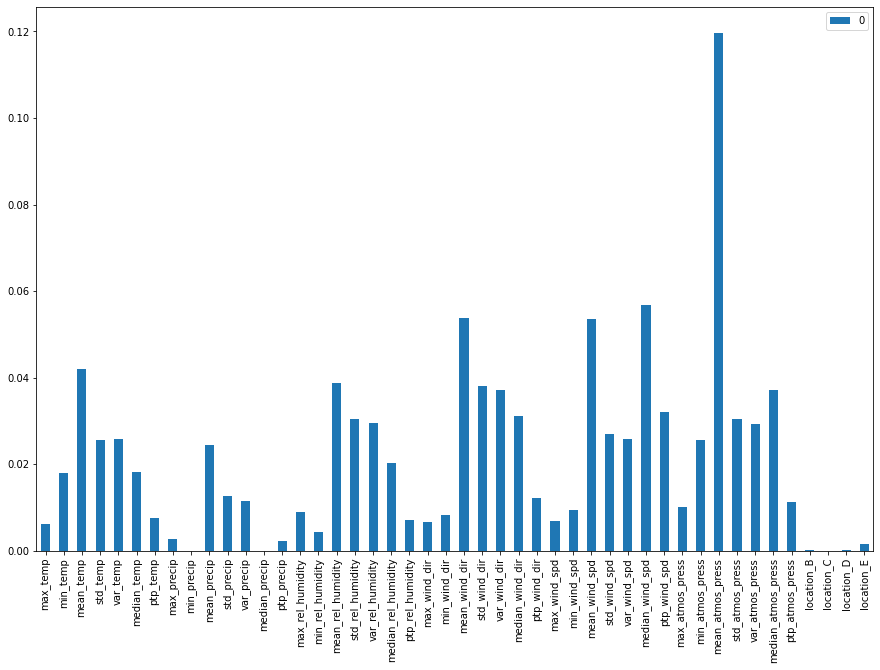

In [17]:
importances = rfr.feature_importances_
forest_importances = pd.Series(importances)
fi = pd.DataFrame(forest_importances)
fi = fi.set_index(columns[1:])
fi.plot.bar(figsize=(15,10))


In [64]:

fi_sort = fi.reset_index()
fi_sort.columns =['feature', 'importance']
fi_sort = fi_sort.sort_values('importance', ascending=False)
feat = fi_sort.feature.to_list()
feat

['mean_atmos_press',
 'median_wind_spd',
 'mean_wind_dir',
 'mean_wind_spd',
 'mean_temp',
 'mean_rel_humidity',
 'std_wind_dir',
 'median_atmos_press',
 'var_wind_dir',
 'ptp_wind_spd',
 'median_wind_dir',
 'std_rel_humidity',
 'std_atmos_press',
 'var_rel_humidity',
 'var_atmos_press',
 'std_wind_spd',
 'var_temp',
 'var_wind_spd',
 'std_temp',
 'min_atmos_press',
 'mean_precip',
 'median_rel_humidity',
 'median_temp',
 'min_temp',
 'std_precip',
 'ptp_wind_dir',
 'var_precip',
 'ptp_atmos_press',
 'max_atmos_press',
 'min_wind_spd',
 'max_rel_humidity',
 'min_wind_dir',
 'ptp_temp',
 'ptp_rel_humidity',
 'max_wind_spd',
 'max_wind_dir',
 'max_temp',
 'min_rel_humidity',
 'max_precip',
 'ptp_precip',
 'location_E',
 'location_B',
 'location_D',
 'location_C',
 'median_precip',
 'min_precip']

In [18]:
location = X_test[['location_B','location_C','location_D','location_E']]
#loc = X_test[['location_B','location_C','location_D','location_E']].idxmax(axis=1)

location.loc[(location['location_B'] == 0) & (location['location_C'] == 0) & (location['location_D'] == 0) & (location['location_E'] == 0), 'location_A'] = 1
location.location_A = location.location_A.fillna(0)
location = location.idxmax(axis=1)


/Users/jonigul/neuefische/AirQo-Ugandan-Air-Quality-Forecast-Challenge/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/jonigul/neuefische/AirQo-Ugandan-Air-Quality-Forecast-Challenge/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/jonigul/neuefische/AirQo-Ugandan-Air-Quality-Forecast-Chall

[Text(0, 0.5, 'Residuals')]

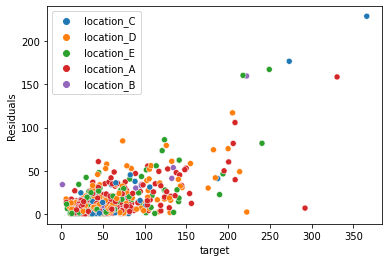

In [19]:
residuen = abs(y_pred_rfr - y_test)
sns.scatterplot(x=y_test ,y=residuen, hue= location).set(ylabel='Residuals')

In [20]:
residuen.shape

(3108,)

In [21]:
#X, y = make_regression(n_features=48)
#rfr_b = RandomForestRegressor(random_state=42)
#rfr_b.fit(X, y)
#y_pred_rfr_b = rfr_b.predict(X_test)
#y_pred_train_rfr_b = rfr_b.predict(X_train)
#print("Train RMSE:", metric(y_train, y_pred_train_rfr_b))
#print("Test RMSE:", metric(y_test, y_pred_rfr_b))
#RSME_train.append(metric(y_train, y_pred_train_rfr_b))
#RSME_test.append(metric(y_test, y_pred_rfr_b))

## Support Vector Machine

In [22]:
svr = SVR()
svr = svr.fit(X_train, y_train)

# predict on test-set
y_pred_svr = svr.predict(X_test)
y_pred_train_svr = svr.predict(X_train)

# RMSE on train and test set
print("Train RMSE:", metric(y_train, y_pred_train_svr))
print("Test RMSE:", metric(y_test, y_pred_svr))
RMSE_train.append(metric(y_train, y_pred_train_svr))
RMSE_test.append(metric(y_test, y_pred_svr))

Train RMSE: 39.455
Test RMSE: 41.564


<AxesSubplot:xlabel='Model'>

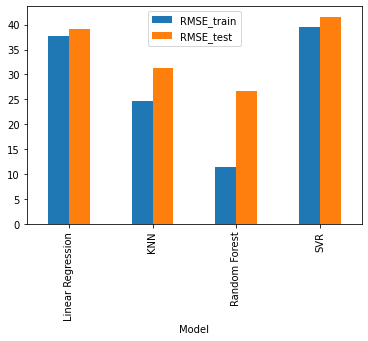

In [23]:
RMSE = {'RMSE_train': RMSE_train, 'RMSE_test': RMSE_test, 'Model':['Linear Regression', 'KNN','Random Forest','SVR']}
baseline = pd.DataFrame(RMSE)
baseline = baseline.set_index('Model')
baseline.plot.bar()
